## Fetch - Data Analyst Take Home Project

### Business Problem Statement

Fetch is a platform that rewards users for scanning receipts, providing valuable insights into consumer purchasing behavior. The goal of this analysis is to explore Fetch's transaction data to identify trends, assess data quality issues, and derive actionable insights that can inform business and marketing strategies. Specifically, we aim to determine the top-performing brands, identify power users, and analyze category performance across different user demographics.

### Analysis Steps:

- Data Exploration:
    - Load and inspect the CSV files
    - Identify missing, duplicate, or inconsistent values
    - Determine any ambiguous or complex fields that need further clarification

- Data Quality Checks:
    - Check for anomalies such as incorrect date formats, negative sales values or incorrect data value formats
    - Identify fields that require transformation

- Business Questions
    - Determine the top 5 brands by receipts scanned for users aged 21 and over
    - Identify the top 5 brands by sales for users with accounts older than six months
    - Define and identify Fetch's power users based on assumptions
    - Determine the leading brand in the Dips & Salsa category

- Business Insights and Stakeholder Communication
    - Highlight an interesting pattern observed from the analysis
    - Summarize key findings in an accessible format
    - Present data quality concerns and unresolved questions

- Future Analysis

In [1067]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings for better readability
warnings.filterwarnings('ignore')

In [1068]:
# Reading the CSV files containing user, transaction, and product data
users_df = pd.read_csv("C:/Users/parul/Downloads/Fetch project/USER_TAKEHOME.csv")
transactions_df = pd.read_csv("C:/Users/parul/Downloads/Fetch project/TRANSACTION_TAKEHOME.csv")
products_df = pd.read_csv("C:/Users/parul/Downloads/Fetch project/PRODUCTS_TAKEHOME.csv")

In [1069]:
# Displaying the first 5 rows of the users df
users_df.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [1070]:
# Displaying information about the users df (column types and missing values)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [1071]:
# Converting to datetime, set errors to NaT
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce')

In [1072]:
# Checking for missing values in the users df
print(users_df.isnull().sum())

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [1073]:
# Creating a new df with null values from users df
users_null = user[['BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER']]
users_null.head()

,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,2000-08-11 00:00:00+00:00,CA,es-419,female
1,2001-09-24 04:00:00+00:00,PA,en,female
2,1994-10-28 00:00:00+00:00,FL,es-419,female
3,NaT,NC,en,NaN
4,1972-03-19 00:00:00+00:00,PA,en,female


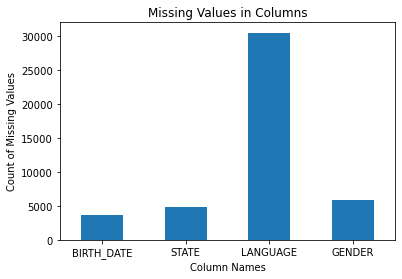

In [1074]:
# Plotting a bar chart of missing values
users_null.isnull().sum().plot(kind = 'bar')
plt.title('Missing Values in Columns')
plt.xlabel('Column Names')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation = 0)
plt.show()

In [1075]:
# Filling missing categorical values
users_df.fillna({'STATE': 'Unknown', 'LANGUAGE': 'Unknown', 'GENDER': 'Unknown'}, inplace=True)
# Filling Null birthdate values with 1800-01-01
default_date = pd.Timestamp('1900-01-01', tz='UTC')
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].fillna(default_date)
# Checking null values after filling/dropping null values
users_df.isnull().sum()

ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64

In [1076]:
# Checking unique values in the State column
users_df['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', 'Unknown', 'OH', 'TX', 'NM',
       'PR', 'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI',
       'IA', 'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL',
       'MS', 'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL',
       'AK', 'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'],
      dtype=object)

In [1077]:
# Checking unique values in the Language column
users_df['LANGUAGE'].unique()

array(['es-419', 'en', 'Unknown'], dtype=object)

In [1078]:
# Checking unique values in the Gender column
users_df['GENDER'].unique()

array(['female', 'Unknown', 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

In [1079]:
# Combining the 'unknown' and 'Unknown' values in the Gender column
users_df['GENDER'] = users_df['GENDER'].str.lower().replace({'unknown': 'Unknown'})
users_df['GENDER'].unique()

array(['female', 'Unknown', 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'non-binary', 'not_specified',
       "my gender isn't listed", 'prefer not to say'], dtype=object)

In [1080]:
# Checking for duplicates, if found, then dropped
if users_df.duplicated().any():
    print(f"Duplicates found and removed from Users dataframe: {users_df.duplicated().sum()}")
    # Handle duplicates (keeping the first occurrence)
    users_df.drop_duplicates(inplace=True)
else:
    print("No duplicates found in Users dataframe")

No duplicates found in Users dataframe


In [1081]:
# Final check
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    100000 non-null  datetime64[ns, UTC]
 3   STATE         100000 non-null  object             
 4   LANGUAGE      100000 non-null  object             
 5   GENDER        100000 non-null  object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


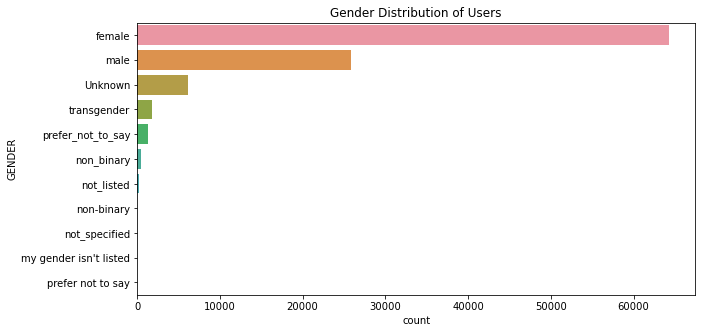

In [1082]:
# Visualization for distribution of gender
plt.figure(figsize=(10, 5))
sns.countplot(y=users_df['GENDER'], order=users_df['GENDER'].value_counts().index)
plt.title("Gender Distribution of Users")
plt.show()

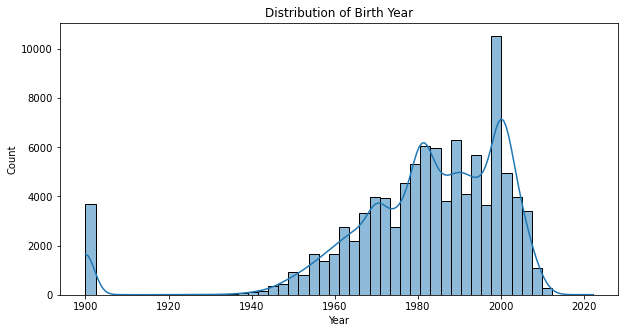

In [1083]:
# Visualization for distribution of Birth year
plt.figure(figsize=(10, 5))
sns.histplot(users_df['BIRTH_DATE'].dt.year, bins=50, kde=True)
plt.title("Distribution of Birth Year")
plt.xlabel("Year")
plt.show()

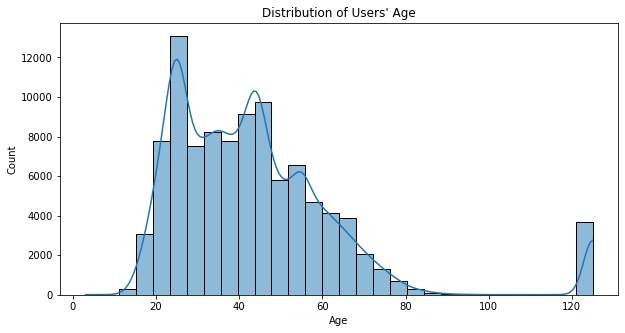

In [1084]:
# Visualization for distribution of age
users_df['AGE'] = pd.to_datetime('today').year - users_df['BIRTH_DATE'].dt.year
plt.figure(figsize=(10, 5))
sns.histplot(users_df['AGE'], bins=30, kde=True)
plt.title("Distribution of Users' Age")
plt.xlabel("Age")
plt.show()

Users dataset has information about the users like the date of creation of account, their birth date, their state, language and gender. I first explored the data, then performed some data quality checks and then created some visualizations. 

Actions performed
- Data type of 2 date columms, Created Date and Birth Date, was changed to datetime object
- 4 Columns had missing/Null values, Birth Date, State, Language and Gender
- Created a new dataframe for the columns with Null values
- Visualized the Null values in the 4 columns
- Since this is real world user data, I cannot delete values. So Null categorical values were replaced with 'Unknown'
- For the Birth date column, Null values were replaced with 1800-01-01
- Checked unique values in 3 categorical columns, State, Language and Gender
- The Gender column already had 'unknown' value. Combined the new 'Unknown' value with old 'unknown' value
- Checked for duplicates but none found
- Visualized the gender distribution for all users
- Visualized the ditribution of birth years of all users
- Visualized the distribution of users' age as of today

In [1085]:
transactions_df.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [1086]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [1087]:
# Converting to datetime
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'], errors='coerce')
# Converting to numeric
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

In [1088]:
# Finding null values
transactions_df.isnull().sum()

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE            5762
FINAL_QUANTITY    12500
FINAL_SALE        12500
dtype: int64

In [1089]:
transactions_df['BARCODE'].unique()

array([1.53000150e+10,            nan, 7.87422298e+10, ...,
       4.11960101e+10, 7.94004454e+10, 7.43230958e+10])

In [1090]:
transactions_df['FINAL_QUANTITY'].unique()

array([1.00e+00,      nan, 2.00e+00, 3.00e+00, 4.00e+00, 4.55e+00,
       2.83e+00, 2.34e+00, 4.60e-01, 7.00e+00, 1.80e+01, 1.20e+01,
       5.00e+00, 2.17e+00, 2.30e-01, 8.00e+00, 1.35e+00, 9.00e-02,
       2.58e+00, 1.47e+00, 1.60e+01, 6.20e-01, 1.24e+00, 1.40e+00,
       5.10e-01, 5.30e-01, 1.69e+00, 6.00e+00, 2.39e+00, 2.60e+00,
       1.00e+01, 8.60e-01, 1.54e+00, 1.88e+00, 2.93e+00, 1.28e+00,
       6.50e-01, 2.89e+00, 1.44e+00, 2.75e+00, 1.81e+00, 2.76e+02,
       8.70e-01, 2.10e+00, 3.33e+00, 2.54e+00, 2.20e+00, 1.93e+00,
       1.34e+00, 1.13e+00, 2.19e+00, 8.30e-01, 2.61e+00, 2.80e-01,
       1.50e+00, 9.70e-01, 2.40e-01, 1.18e+00, 6.22e+00, 1.22e+00,
       1.23e+00, 2.57e+00, 1.07e+00, 2.11e+00, 4.80e-01, 9.00e+00,
       3.11e+00, 1.08e+00, 5.53e+00, 1.89e+00, 1.00e-02, 2.18e+00,
       1.99e+00, 4.00e-02, 2.25e+00, 1.37e+00, 3.02e+00, 3.50e-01,
       9.90e-01, 1.80e+00, 3.24e+00, 9.40e-01, 2.04e+00, 3.69e+00,
       7.00e-01, 2.52e+00, 2.27e+00])

In [1091]:
transactions_df['FINAL_SALE'].unique()

array([  nan,  1.49,  3.49, ..., 11.02, 20.17, 42.38])

In [1092]:
transactions_df.fillna({'FINAL_QUANTITY': 0, 'FINAL_SALE': 0, 'BARCODE': 0}, inplace=True)
transactions_df.isnull().sum()

RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64

In [1093]:
# Checking for duplicates, if found, then dropped
if transactions_df.duplicated().any():
    print(f"Duplicates found and removed from Transactions dataframe: {transactions_df.duplicated().sum()}")
    transactions_df.drop_duplicates(inplace=True)
else:
    print("No duplicates found in Transactions dataframe")

Duplicates found and removed from Transactions dataframe: 335


In [1094]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49665 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      49665 non-null  object             
 1   PURCHASE_DATE   49665 non-null  datetime64[ns]     
 2   SCAN_DATE       49665 non-null  datetime64[ns, UTC]
 3   STORE_NAME      49665 non-null  object             
 4   USER_ID         49665 non-null  object             
 5   BARCODE         49665 non-null  float64            
 6   FINAL_QUANTITY  49665 non-null  float64            
 7   FINAL_SALE      49665 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(3)
memory usage: 3.4+ MB


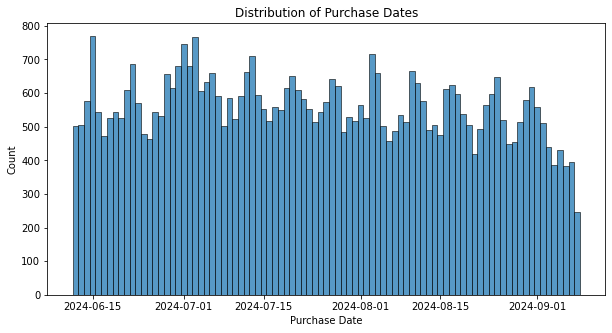

In [1095]:
# Visualization for distribution of purchase dates
plt.figure(figsize=(10, 5))
sns.histplot(transactions_df['PURCHASE_DATE'].dt.date, bins=50)
plt.title("Distribution of Purchase Dates")
plt.xlabel("Purchase Date")
plt.show()

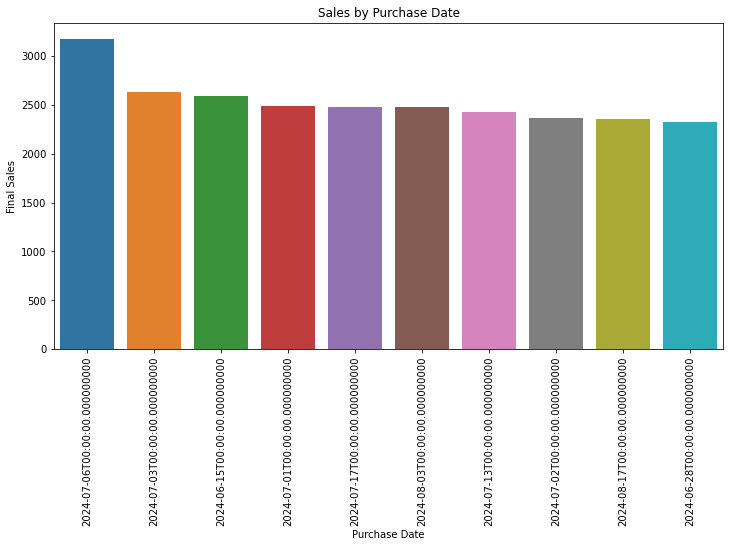

In [1096]:
# Visualizing final sales by purchase date
sales_purchase_date = transactions_df.groupby('PURCHASE_DATE')['FINAL_SALE']\
                      .sum().reset_index().sort_values(by = 'FINAL_SALE', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x='PURCHASE_DATE', y='FINAL_SALE', data=sales_purchase_date.head(10))
plt.title("Sales by Purchase Date")
plt.xlabel("Purchase Date")
plt.ylabel("Final Sales")
plt.xticks(rotation=90)
plt.show()

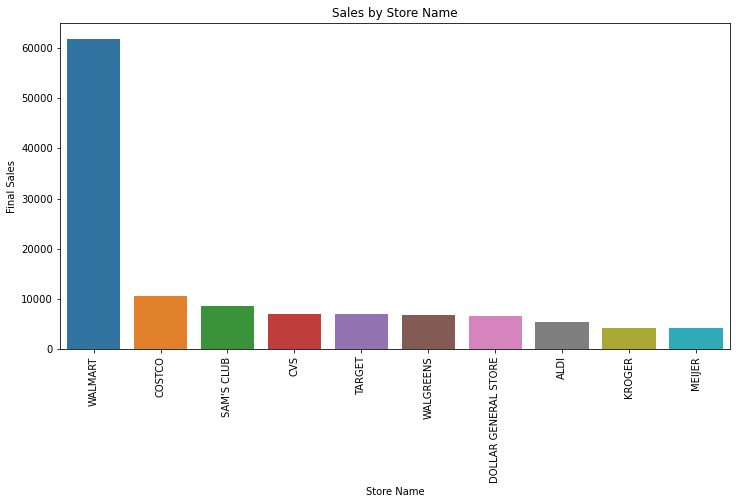

In [1097]:
# Visualizing final sales by store name
sales_purchase_store = transactions_df.groupby('STORE_NAME')['FINAL_SALE']\
                      .sum().reset_index().sort_values(by = 'FINAL_SALE', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(x='STORE_NAME', y='FINAL_SALE', data=sales_purchase_store.head(10))
plt.title("Sales by Store Name")
plt.xlabel("Store Name")
plt.ylabel("Final Sales")
plt.xticks(rotation=90)
plt.show()

Transactions dataset has information about the transactions done by the users, like the date of purchase, the scanning date (assuming thats rewards scan), the store the transaction was made on, quantity of units purchased and final sale amount. I first explored the data, then performed some data quality checks and then created some visualizations. 

Actions performed
- Data type of 2 date columms, Purchase Date and Scan Date, was changed to datetime object
- Data type of 2 numerical columms, Final Quantity and Final Sale, was changed to numeric object
- 3 Columns had missing/Null values, Barcode, Final Quantity and Final sale
- Checked unique values in the 3 columns with Null values
- Since this is real world user data, I cannot delete values.So for all 3 columns, data with null values were replaced with 0
- Checked for duplicates and removed 335 duplicates
- Visualized the distribution of purchase dates
- Visualized the final sales with purchase dates
- Visualized the sales with store name

In [1098]:
products_df.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [1099]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [1100]:
# Finding null values
products_df.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [1101]:
# Filling missing values
products_df.fillna({'CATEGORY_1': 'Unknown', 'CATEGORY_2': 'Unknown', 'CATEGORY_3': 'Unknown', 'CATEGORY_4': 'Unknown',
                     'MANUFACTURER': 'Unknown', 'BRAND': 'Unknown', 'BARCODE': 0}, inplace=True)  

In [1102]:
# Checking unique values in Category 1
products_df['CATEGORY_1'].unique()

array(['Health & Wellness', 'Snacks', 'Beverages', 'Pantry', 'Alcohol',
       'Apparel & Accessories', 'Restaurant', 'Needs Review', 'Dairy',
       'Home & Garden', 'Unknown', 'Household Supplies', 'Meat & Seafood',
       'Deli & Bakery', 'Sporting Goods', 'Produce', 'Office & School',
       'Frozen', 'Arts & Entertainment', 'Animals & Pet Supplies',
       'Electronics', 'Beauty', 'Toys & Games', 'Mature',
       'Vehicles & Parts', 'Baby & Toddler', 'Luggage & Bags', 'Media'],
      dtype=object)

In [1103]:
# Checking unique values in Manufacturer
products_df['MANUFACTURER'].unique()

array(['Unknown', 'PLACEHOLDER MANUFACTURER', 'COLGATE-PALMOLIVE', ...,
       'VIDETTE INC', 'SCRUB-IT', 'OUTDOOR PRODUCT INNOVATIONS, INC.'],
      dtype=object)

In [1104]:
# Checking unique values in Brand
products_df['BRAND'].unique()

array(['Unknown', 'ELECSOP', 'COLGATE', ..., 'SHULEMIN', 'RHINO BLINDS',
       'GATEWAY'], dtype=object)

In [1105]:
# Final check for null values
products_df.isnull().sum()

CATEGORY_1      0
CATEGORY_2      0
CATEGORY_3      0
CATEGORY_4      0
MANUFACTURER    0
BRAND           0
BARCODE         0
dtype: int64

In [1106]:
# Handling duplicates
if products_df.duplicated().any():
    print(f"Duplicates found and removed from Products dataframe: {products_df.duplicated().sum()}")
    products_df.drop_duplicates(inplace=True)
else:
    print("No duplicates found in Products dataframe")

Duplicates found and removed from Products dataframe: 215


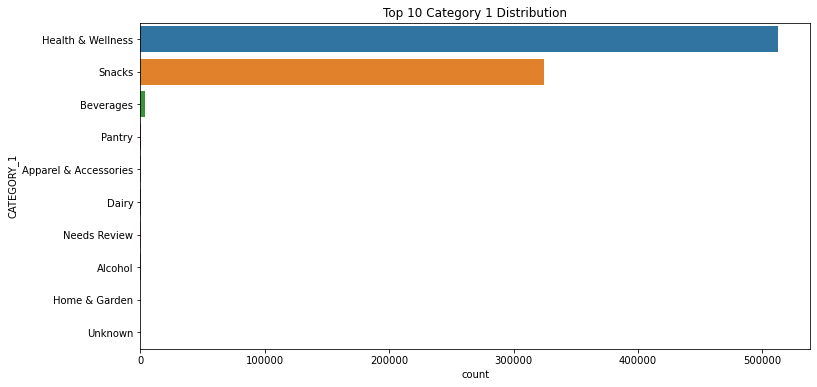

In [1107]:
# Visualizing distribution of top 10 categories in Category 1
top10_category1 = products_df['CATEGORY_1'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y=products_df['CATEGORY_1'], order=top10_category1)
plt.title("Top 10 Category 1 Distribution")
plt.show()

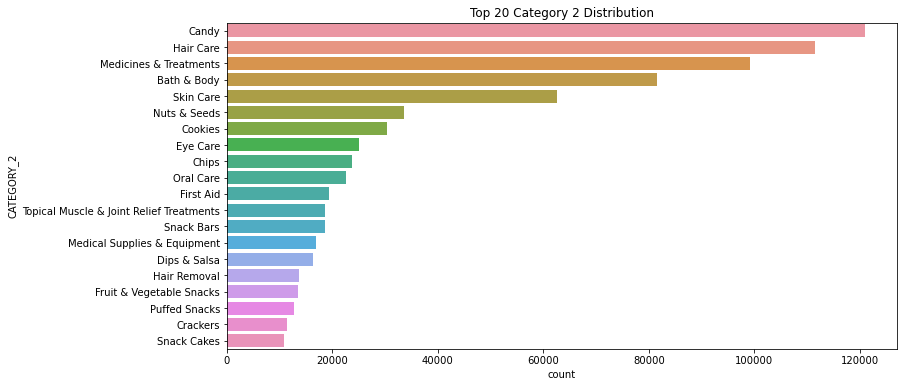

In [1108]:
# Visualizing distribution of top 20 categories in Category 2
top20_category2 = products_df['CATEGORY_2'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
sns.countplot(y=products_df['CATEGORY_2'], order=top20_category2)
plt.title("Top 20 Category 2 Distribution")
plt.show()

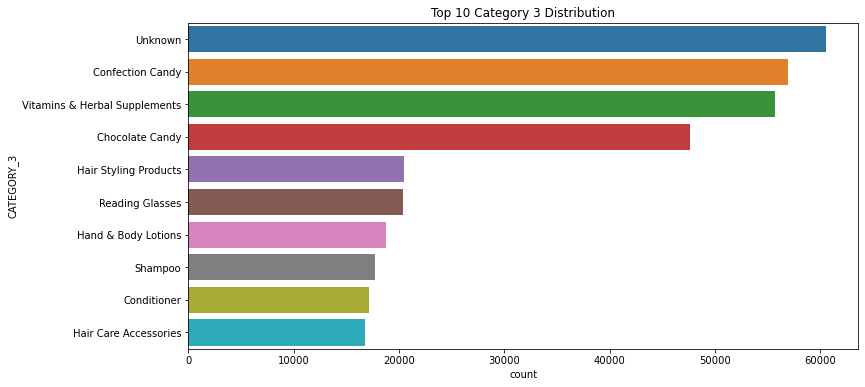

In [1109]:
# Visualizing distribution of top 10 categories in Category 3
top10_category3 = products_df['CATEGORY_3'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y=products_df['CATEGORY_3'], order=top10_category3)
plt.title("Top 10 Category 3 Distribution")
plt.show()

Products dataset has information about the available products, like the products categories, manufacturer, brand and barcode. I first explored the data, then performed some data quality checks and then created some visualizations. 

Steps performed
- All columns except Barcode are categorical
- All 7 Columns had missing/Null values
- Since this is real world user data, I cannot delete values. So Null values in barcode column were replaced with 0 and all other columns' null values were replaced with 'Unknown'
- Checked unique values in the 3 columns, Category 1, Manufacturer and Brand
- Checked for duplicates and removed 215 duplicates
- Visualized the distribution of top 10 categories in Category 1
- Visualized the distribution of top 20 categories in Category 2
- Visualized the distribution of top 10 categories in Category 3

### Business Questions

What are the top 5 brands by receipts scanned among users 21 and over?
What are the top 5 brands by sales among users that have had their account for at least six months?
Who are Fetch's power users?
Which is the leading brand in the Dips & Salsa category?

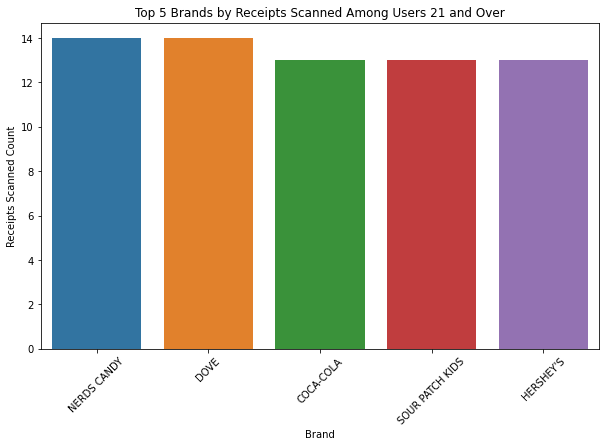

In [1110]:
# Top 5 brands by receipts scanned among users 21 and over

# Filtering users who are 21 or older
users_21plus = users_df[users_df['AGE'] >= 21]

# Merging transactions with user data
transactions_21plus = pd.merge(transactions_df, users_21plus[['ID']], left_on='USER_ID', right_on='ID')
# Merging with product data to get brand information
transactions_withbrands = pd.merge(transactions_21plus, products_df[['BARCODE', 'BRAND']], on='BARCODE', how='left')

# Removing 'Unknown' brands
transactions_withbrands = transactions_withbrands[transactions_withbrands['BRAND'] != 'Unknown']

# Counting unique receipts by brand
brand_receipts = transactions_withbrands.groupby('BRAND')['RECEIPT_ID'].nunique().reset_index()

# Sorting by receipts scanned and getting top 5 brands
top_5_brands = brand_receipts.sort_values(by='RECEIPT_ID', ascending=False).head(5)

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='BRAND', y='RECEIPT_ID', data=top_5_brands)
plt.xticks(rotation=45)
plt.title("Top 5 Brands by Receipts Scanned Among Users 21 and Over")
plt.xlabel("Brand")
plt.ylabel("Receipts Scanned Count")
plt.show()

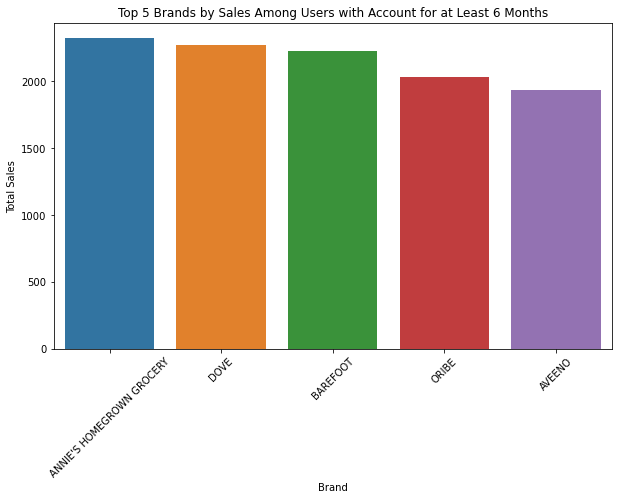

In [1111]:
# Top 5 brands by sales among users that have had their account for at least six months

# Filtering users who have had an account for at least 6 months
users_six_months = users_df[pd.to_datetime('today') - users_df['CREATED_DATE'].dt
                            .tz_localize(None) >= pd.Timedelta(days=180)]

# Merging transactions with users and products to get brand information
top_brands_sales = transactions_df[transactions_df['USER_ID'].isin(users_six_months['ID'])]
top_brands_sales = top_brands_sales.merge(products_df, on='BARCODE')

# Excluding 'Unknown' Brands
top_brands_sales = top_brands_receipts[top_brands_receipts['BRAND'] != 'Unknown']

# Aggregating sales by brand
top_5_brands_sales = top_brands_sales.groupby('BRAND')['FINAL_SALE'].sum().sort_values(ascending=False).head(5)

# Visualizing Top 5 Brands by Sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_brands_sales.index, y=top_5_brands_sales.values)
plt.title("Top 5 Brands by Sales Among Users with Account for at Least 6 Months")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.show()

### Power Users

According to my definition, power users are customers who are the most engaged and spend the most on the platform. To define them, I look at a few key factors:
- They're in the top 15% of spenders based on total spending.
- They're in the top 10% for the number of receipts scanned.
- They've had an active account for at least six months.
These thresholds can be adjusted as business needs change. We might also want to expand the criteria to include things like consistent scanning behavior over time or other engagement metrics that give us a fuller picture of user loyalty and activity.

#### Assumptions

- I define engagement as spending and scanning receipts. I assume that users who spend more and scan more receipts are strong candidates for power users. In the future, we could also consider other behaviors, like app/web interactions, or retention metrics, to get a more complete sense of engagement.
- I assume that 6 months of activity would mean meaningful data. Users who have been active for at least six months are more likely to provide actionable insights into power user behavior. I am filtering out newer users who might still be learning the platform.
- The 15% spending and 10% scanning thresholds are based on what I see in the data right now, but it can be adjusted based on specific business goals or new patterns in user behavior.
- I assume that the data we have on spending, receipt scans, and account age is accurate and up to date. If there are gaps like missing transactions, it could throw off the identification of power users.

In [1112]:
# Defining Power users

# Users with highest spending
user_spending = transactions_df.groupby('USER_ID')['FINAL_SALE'].sum().reset_index()
user_spending.rename(columns={'FINAL_SALE': 'TOTAL_SPENT'}, inplace=True)
# Top 15% of highest spenders
spending_threshold = user_spending['TOTAL_SPENT'].quantile(0.85)
high_spenders = user_spending[user_spending['TOTAL_SPENT'] >= spending_threshold]

# Users with most receipts scanned
user_receipt_counts = transactions_df.groupby('USER_ID')['RECEIPT_ID'].nunique().reset_index()
user_receipt_counts.rename(columns={'RECEIPT_ID': 'TOTAL_RECEIPTS'}, inplace=True)
# Top 10% of users with most receipts scanned
receipt_threshold = user_receipt_counts['TOTAL_RECEIPTS'].quantile(0.90)
most_receipts_scanned = user_receipt_counts[user_receipt_counts['TOTAL_RECEIPTS'] >= receipt_threshold]

# Account for atleast 6 months
# users_six_months was defined in the last business problem

# Merging the 3 criteria
power_users_df = most_receipts_scanned.merge(high_spenders, on='USER_ID', how='inner')
power_users_df = power_users_df.merge(users_six_months, left_on='USER_ID', right_on='ID', how='inner')

print(power_users_df)

                     USER_ID  TOTAL_RECEIPTS  TOTAL_SPENT  \
0   5b441360be53340f289b0795               2        18.32   
1   5c366bf06d9819129dfa1118               3        17.42   
2   5f21e60446f11314a16015de               2        17.96   
3   610a8541ca1fab5b417b5d33               3        17.65   
4   61a58ac49c135b462ccddd1c               3        19.92   
5   62c09104baa38d1a1f6c260e               3        20.28   
6   62ffec490d9dbaff18c0a999               3        52.28   
7   632fc9dc0c625b72ae991f83               2        16.75   
8   6351760a3a4a3534d9393ecd               2        27.74   
9   643059f0838dd2651fb27f50               2        75.99   
10  64dd9170516348066e7c4006               2        26.52   
11  6682b24786cc41b000ce5e77               2        17.30   

                          ID              CREATED_DATE  \
0   5b441360be53340f289b0795 2018-07-10 02:01:04+00:00   
1   5c366bf06d9819129dfa1118 2019-01-09 21:47:28+00:00   
2   5f21e60446f11314a16015de 202

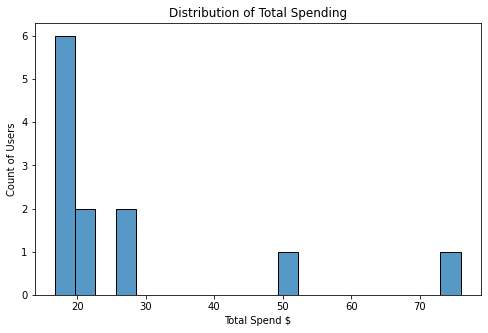

In [1113]:
# Visualizing the distribution for Total Spending for power users
plt.figure(figsize=(8, 5))
sns.histplot(power_users_df['TOTAL_SPENT'], bins=20)
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spend $")
plt.ylabel("Count of Users")
plt.show()

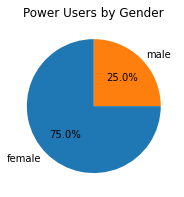

In [1114]:
# Visualizing the distribution of gender for power users
plt.figure(figsize=(3, 6))
gender_counts = power_users_df['GENDER'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title("Power Users by Gender")
plt.ylabel("")
plt.show()

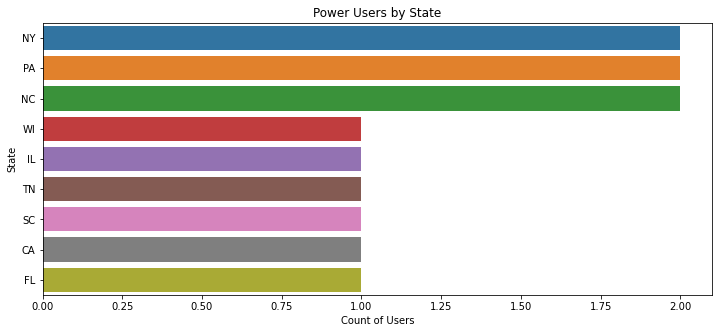

In [1115]:
# Visualizing the power users by state
plt.figure(figsize=(12, 5))
sns.countplot(data=power_users_df, y='STATE', order=power_users_df['STATE'].value_counts().index)
plt.title("Power Users by State")
plt.xlabel("Count of Users")
plt.ylabel("State")
plt.show()

### Leading Brand in Dips & Salsa 

#### Assumptions
- I do not have the full picture on why we are focusing on leading brands for the Dips and Salsa category. My assumption is that the brands with the most sales in this category are the leading brands. This criteria could be updated based on the business context.
- I assume that the brand information in the product dataset is accurate, and the products are correctly categorized under 'Dips & Salsa'
- I assume that the FINAL_SALE data is accurate and up to date.
- The choice of focusing on the top 10 brands is based on the idea that these represent the most successful brands within the Dips and Salsa category, but this threshold could be adjusted based on business needs.

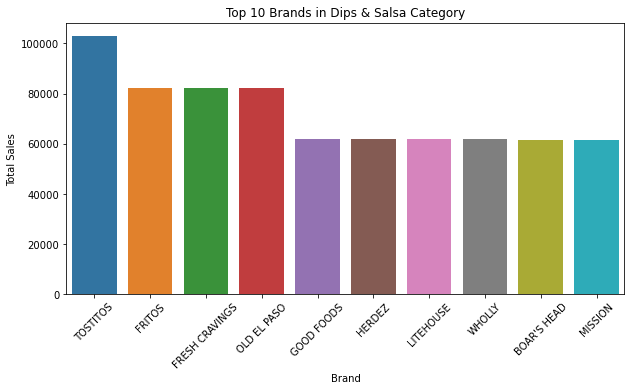

In [1116]:
# Leading Brand in Dips & Salsa 

# Merging transactions  dataset with product data
dips_salsa_sales = transactions_df.merge(products_df, on='BARCODE', how='inner')
dips_salsa_sales = dips_salsa_sales[dips_salsa_sales['CATEGORY_2'] == 'Dips & Salsa']

# Aggregating sales by brand
brand_sales = dips_salsa_sales.groupby('BRAND', as_index=False)['FINAL_SALE'].sum()

# Excluding 'Unknown' Brands
brand_sales = brand_sales[brand_sales['BRAND'] != 'Unknown']

# Getting top 10 brands
top_brands = brand_sales.sort_values(by='FINAL_SALE', ascending=False).head(10)

# Visualizing top 10 brands in the Dips & Salsa category
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands['BRAND'], y=top_brands['FINAL_SALE'])
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Top 10 Brands in Dips & Salsa Category')
plt.xticks(rotation=45)
plt.show()


### Stakeholder Communication

Hi Team,

I wanted to share some key findings and insights from my recent analysis of the user, transactions, and products datasets. Below is a summary of my process, key data quality issues, interesting trends, and requests for action.

Key Data Quality Issues

- Missing Values: All three datasets I analyzed had Null values in some key fields. For ex, the Barcode in both transactions and products data had null values. The transactions data had missing data for sales and quantity, and the products data had missing values for category, brand as well as manufacturer. I handled categorical null values by replacing with 'Unknown', date null values by replacing with 1900-01-01 and quantitative null values by replacing with 0.
- Duplicate Data: Both the transactions and products datasets had duplicate values, which I removed from my analysis to ensure a clean analysis.

Interesting Trends in the Data

- User Demographics: After visualizing the distribution of users' ages and birth years, it appears that the majority of our users are between 25-35 years old, which could offer opportunities for targeted marketing and product strategies. Regarding gender distribution, users have a slight majority identifying as female.
- Sales Trends: Visualizing stores with the final sales amount identified Walmart as the highest sales store, followed by Costco. This could offer opportunities for brand partnerships.
- Category distribution: Looking at the spread of products by category, I noticed that we have the most products in the Health and Wellness category, followed by Snacks. One interesting opportunity here could be to reach out to customers and understand if they would like more product options in other categories. 
- Dips & Salsa Category: The top 10 brands in the Dips & Salsa category based on sales show a clear market leader, which may inform future inventory, marketing, and sales strategies. This insight could be particularly useful for upcoming campaigns focused on product performance.

Key Insights

- Power Users: I've defined power users as those who are in the top 15% of spenders based on total spending, are in the top 10% of receipt scanners, and have been active for at least six months. This segmentation identifies a high-value cohort of customers who can be targeted for personalized offers and marketing. The thresholds are adjustable, and we could expand the criteria to include other engagement metrics, such as app or web interactions.
- Leading Brand in Dips & Salsa: Based on total sales, I identified the Tostitos as the leading brand in the Dips & Salsa category, followed by Fritos and Fresh Cravings. We might want to dive deeper into the context for focusing on these brands,  whether it's for an upcoming campaign or inventory planning.

Request for Action:

- Data Validation Audit: Can we further investigate the 'Unknown' values in the datasets to ensure there are no larger issues with data collection or categorization? Can we also sync on how to best handle null values with different data types? Can we also create alerts to inform us if there are missing and duplicate values in the data?
- Power User Analysis Feedback: Does the current power user segmentation align with our business goals? Would you prefer different thresholds or additional metrics (e.g., app usage or retention)?
- Brand Strategy for Dips & Salsa: Are there specific business objectives or strategies driving the focus on top brands in the Dips & Salsa category? This could help refine our analysis further.

Let me know your thoughts and if you'd like more details on any of these points. Looking forward to your feedback!